In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## Detecting outliers using Boxplot

Text(0.5, 0, 'Data')

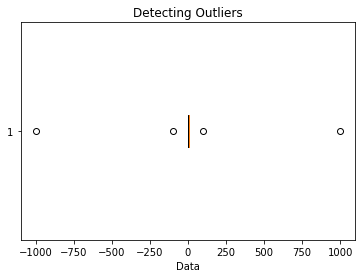

In [9]:
data = [1,2,3,4,5,6,7,8,9,100,-100,1000,-1000]
plt.boxplot(data,vert=False)
plt.title('Detecting Outliers')
plt.xlabel('Data')

## Detecting outliers using the Z-scores

Steps:
1. loop through all the data points and compute the Z-score using the formula (Xi-mean)/std.
2. define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers

In [19]:
outliers=[]
def detect_outliers_with_zscore(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    print(mean,std)
        
    for i in data:
        z_score = (i - mean)/std
        #print(z_score)
        if np.abs(z_score) > threshold:
           outliers.append(i)
            
        
    return outliers

In [27]:
data = [1,2,3,4,5,6,7,8,9,100,-100,1000,-1000,10000]

outliers = detect_outliers_with_zscore(data)
print('Outliers are', outliers)

717.5 2602.3752543178152
Outliers are [10000, 10000]


## Detecting outliers using the Inter Quantile Range(IQR)


Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

steps:
1. Sort the dataset in ascending order
2. calculate the 1st and 3rd quartiles(Q1, Q3)
3. compute IQR=Q3-Q1
4. compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
5. loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and  mark them as outliers

In [28]:
outliers_iqr=[]
def detecting_outliers_with_IQR(data):
    sorted_data= sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*(iqr)
    upper_bound = q3 + 1.5*(iqr)
    
    for i in data:
        if (i< lower_bound or i > upper_bound):
            outliers_iqr.append(i)
            
    return outliers_iqr
            

In [29]:
outliers_iqr = detecting_outliers_with_IQR(data)
print('Outiers are',outliers_iqr)

Outiers are [100, -100, 1000, -1000, 10000]


## Handling Outliers


1. Trimming/removing the outlier
2. Quantile based flooring and capping
3. Mean/Median imputation

### Trimming/Remove the outliers
In this technique, we remove the outliers from the dataset

In [68]:
print('outliers_iqr',outliers_iqr)
print('data',data)
print(type(data))

data_arr = np.asarray(data,dtype='float64')
print('data_arr',data_arr)

outlier_arr = np.asarray(outliers_iqr,dtype='float64')
print('outlier_arr',outlier_arr)
    
for i in outliers_iqr:
    
    #a= np.delete(data,np.where(i==data))
    #print(d)
    a = np.delete(data_arr,np.where(data_arr==i))
    
print('a',a)


outliers_iqr [100, -100, 1000, -1000, 10000]
data [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, -100, 1000, -1000, 10000]
<class 'list'>
data_arr [ 1.e+00  2.e+00  3.e+00  4.e+00  5.e+00  6.e+00  7.e+00  8.e+00  9.e+00
  1.e+02 -1.e+02  1.e+03 -1.e+03  1.e+04]
outlier_arr [  100.  -100.  1000. -1000. 10000.]
a [ 2.e+00  3.e+00  4.e+00  5.e+00  6.e+00  7.e+00  8.e+00  9.e+00  1.e+02
 -1.e+02  1.e+03 -1.e+03  1.e+04]


In [79]:
series_data = pd.Series(data)
series_outlier = pd.Series(outliers_iqr)

In [80]:
series_data

0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9       100
10     -100
11     1000
12    -1000
13    10000
dtype: int64

In [81]:
series_outlier

0      100
1     -100
2     1000
3    -1000
4    10000
dtype: int64

In [87]:
for i in series_outlier:
    
    #a= np.delete(data,np.where(i==data))
    #print(d)
    # a = np.delete(series_data,series_data.where(series_data==i))
        
    #a = np.delete(series_data,series_data.where(series_data==i))
    
    series_data.drop(i)
    
# print('a',a)

print('series_data',series_data)

KeyError: '[100] not found in axis'

## Above code not working

## Quantile based flooring and capping
In this technique, the outlier is capped at a certain value above the 90th percentile value or 
floored at a factor below the 10th percentile value

In [70]:
tenth_percentile = np.percentile(data, 10)
ninetieth_percentile = np.percentile(data, 90)

In [71]:
tenth_percentile

-69.69999999999999

In [72]:
ninetieth_percentile

730.0000000000009

In [91]:
# The values less than 10th percentile are replaced with 10th percentile
b = np.where(data<tenth_percentile, tenth_percentile, data)

In [92]:
# The values greater than 90th percentile are replaced with 90th percentile 
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

In [93]:
b

array([  1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,   9. ,
       100. , -69.7, 730. , -69.7, 730. ])

In [90]:
print(len(data), len(b))

14 14


## Mean/Median imputation

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value

In [99]:
median = np.median(data)# Replace with median
print('outliers_iqr',outliers_iqr)
for i in outliers_iqr:
    c = np.where(data==i,data,median)
print("Sample: ", data)
print("New array: ",c)
# print(x.dtype)

outliers_iqr [100, -100, 1000, -1000, 10000]
Sample:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 100, -100, 1000, -1000, 10000]
New array:  [5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5 5.5]


## Above code not working